[Notion](https://www.notion.so/aspirina180mg/Soy-Henry-49afb64d6c0641cc80dbc0378dd2db34?pvs=4)

[Kick-Off](https://drive.google.com/file/d/1l1SM-UAw5Mdkr6lmQ9X5UI4cxU_FRg_D/view)

[Slides](https://docs.google.com/presentation/d/1kRrCZDL-ZgZnm4DQ62Ovelf92uP-s4b7cdtp3gkK_kU/edit#slide=id.g2420ab8e36f_0_208)

[Repositorio](https://github.com/soyHenry/PI_DA/tree/Full_Time)

[Rúbrica](https://docs.google.com/spreadsheets/d/e/2PACX-1vTy9Ome3iLIl40SZ2jciZLiwARr9MVXfo_Mud3vVCin9P4zroAw_oxVQVch6m4TKivmUjFrYJKMJJhS/pubhtml)

# **EDA**

## **Importación de librerías**

*   `numpy` para realisar cálculos matemáticos y estadísticos.
*   `pandas` para realizar análisis de datos.
*   `matplotlib` para realisar gráficos de los datos.
*   `seaborn` para realisar un heatmap.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Carga de datos**

### **Se cargan los datos desde archivos parquet pre-procesados.**

*   homicidios se carga en df_homicidios

In [2]:
df_homicidios = pd.read_parquet("Datasets/df_homicidios.parquet")

## **Valores atípicos y Outliers**

In [3]:
def identificar_outliers_std(df, columna, umbral=3):
    """
    df: DataFrame
    columna: Nombre de la columna en la que se identificarán los outliers
    umbral: desviación por encima o debajo de la media para considerar un valor como outlier
    """
    promedio = df[columna].mean()
    std = df[columna].std()
    limite_inferior = promedio - umbral * std
    limite_superior = promedio + umbral * std
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers


outliers = identificar_outliers_std(df_homicidios, "Altura")
print("Outliers en df_homicidios:")
print(outliers)
del outliers
del identificar_outliers_std

Outliers en df_homicidios:
            ID      ACUSADO      FECHA                HORA  COMUNA  \
124  2016-0154         MOTO 2016-11-26 1900-01-01 14:14:00       8   
406  2018-0116       CARGAS 2018-11-01 1900-01-01 10:50:00       8   
442  2019-0008     MULTIPLE 2019-01-30 1900-01-01 22:45:00       8   
671  2021-0052  OBJETO FIJO 2021-06-20 1900-01-01 05:40:00       8   

          LUGAR_DEL_HECHO TIPO_DE_CALLE           Calle   Altura Cruce  \
124     AV GRAL PAZ 15200      GRAL PAZ  PAZ, GRAL. AV.  15200.0  None   
406  Paz, Gral. Av. 14800      GRAL PAZ  PAZ, GRAL. AV.  14800.0  None   
442  PAZ, GRAL. AV. 16080      GRAL PAZ  PAZ, GRAL. AV.  16080.0  None   
671  PAZ, GRAL. AV. 14723      GRAL PAZ  PAZ, GRAL. AV.  14723.0  None   

    Dirección Normalizada      pos x      pos y  N_VICTIMAS VICTIMA  \
124  PAZ, GRAL. AV. 15200 -58.490078 -34.682510           1    MOTO   
406  PAZ, GRAL. AV. 14800 -58.493713 -34.679813           1  PEATON   
442  PAZ, GRAL. AV. 16080 -58.478024 -

Se puede observar que las filas destacadas son las que presentan datos faltantes en la columna "Cruce", por lo que se ignorará esta información faltante por no ser un dato primordial,m se tiene otros datos con los que se puede inferir la ubicación.

## **Análisis Monovariado**

*Se utilizó el siguiente código para hacer un análisis general de las variables e identificar posibles highlights con las que comenzar el análisis más en profundidad, no se ejecutará por razones de ahorrar espacio y tiempo de procesamiento en el archivo.*

In [4]:
''' Código de exploración univariada automática
# Función para exploración univariada de variables numéricas
def exploracion_univariada_numerica(df):
    # Histogramas
    df.select_dtypes(include=['int', 'float']).hist(figsize=(12, 8))
    plt.suptitle('Histogramas de Variables Numéricas', fontsize=16)
    plt.show()
    
    # Boxplots
    for column in df.select_dtypes(include=['int', 'float']).columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df[column], orient="h")
        plt.title(f'Boxplot de {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.show()
    
    # Estadísticas descriptivas
    print("Estadísticas descriptivas de variables numéricas:")
    print(df.describe())
    print("\n")

# Función para exploración univariada de variables categóricas
def exploracion_univariada_categorica(df):
    # Gráficos de barras
    for column in df.select_dtypes(include=['object']).columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column, palette='Set3')
        plt.title(f'Gráfico de Barras de {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.xticks(rotation=45)
        plt.show()
    
    # Conteos
    print("Conteo de valores para variables categóricas:")
    for column in df.select_dtypes(include=['object']).columns:
        print(df[column].value_counts())
        print("\n")

# Exploración univariada de df_homicidios
print("Exploración univariada de df_homicidios:")
exploracion_univariada_numerica(df_homicidios)
exploracion_univariada_categorica(df_homicidios)

# Exploración univariada de df_lesiones
print("Exploración univariada de df_lesiones:")
exploracion_univariada_numerica(df_lesiones)
exploracion_univariada_categorica(df_lesiones)
'''
print("") # necesario para eliminar impresión de todo el código como salida

### Hora de Accidente

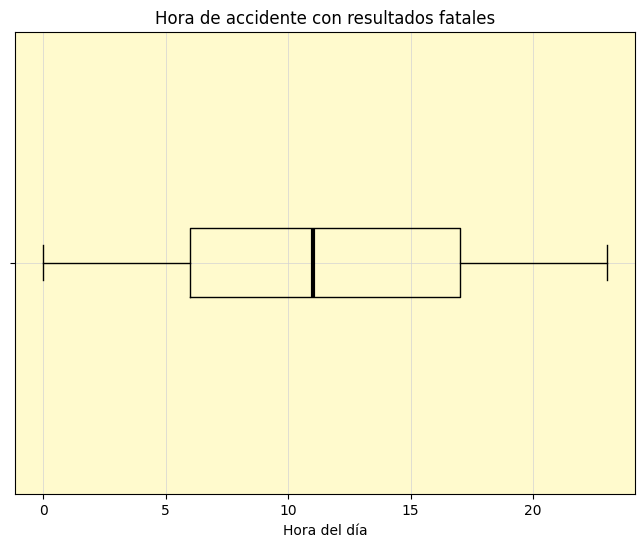

Estadísticas relevantes para df_homicidios.HORA:
Promedio: 11.572237960339944
Mediana: 11.0
Rango Intercuartil: 11.0
Mínimo: 0
Máximo: 23
Desviación Estandar: 6.683399129230539


In [5]:
# Gráfico de caja y bigotes
plt.figure(figsize=(8, 6))
plt.boxplot(
    df_homicidios["HORA"].dt.hour,
    vert=False,
    labels=[""],
    medianprops=dict(color="Black", linewidth=3),
)
plt.xlabel("Hora del día")
plt.title("Hora de accidente con resultados fatales")
plt.gca().set_facecolor("lemonchiffon")
plt.grid(True, color="lightgray", linewidth=0.5, zorder=0)
plt.show()

print("Estadísticas relevantes para df_homicidios.HORA:")
print(f"Promedio: {df_homicidios['HORA'].dt.hour.mean()}")
print(f"Mediana: {df_homicidios['HORA'].dt.hour.median()}")
print(
    f"Rango Intercuartil: {df_homicidios['HORA'].dt.hour.quantile(0.75)-df_homicidios['HORA'].dt.hour.quantile(0.25)}"
)
print(f"Mínimo: {df_homicidios['HORA'].dt.hour.min()}")
print(f"Máximo: {df_homicidios['HORA'].dt.hour.max()}")
print(f"Desviación Estandar: {df_homicidios['HORA'].dt.hour.std()}")

Se observa que la hora promedio de accidenes fatales ronda las 11:30, la mediana, siendo 11 indica que hay más accidentes durante el medio día que durante la media noche, el rango intercuartil con un valor de 11 indica que hay una leve concentración en los horarios por debajo y por sobre la mediana, es decir, a las 11, finalmente la desviación estandar, siendo de un poco más de 6 horas y media, indica una gran dispersión en los datos, por lo que no hay un rango horario exacto donde hayan más muertes causadas por accidentes viáles, sino que se registran accidentes durante todo el día, pero se observa una leve tendencia a haber más accidentes durante el día que durante la noche.

**Conclusión Temporal**

Hay accidentes viales fatales durante todas las horas del día, hay una leve concentración durante las horas entre las 6 am y las 5 pm, con una división de esta misma concentración a las 11 am, indicando que la mayor concentración de accidentes es durante el tramo entre las 6 am y las 11 am, pero esto es en un grado leve, no algo significativo.

### Edad de víctima

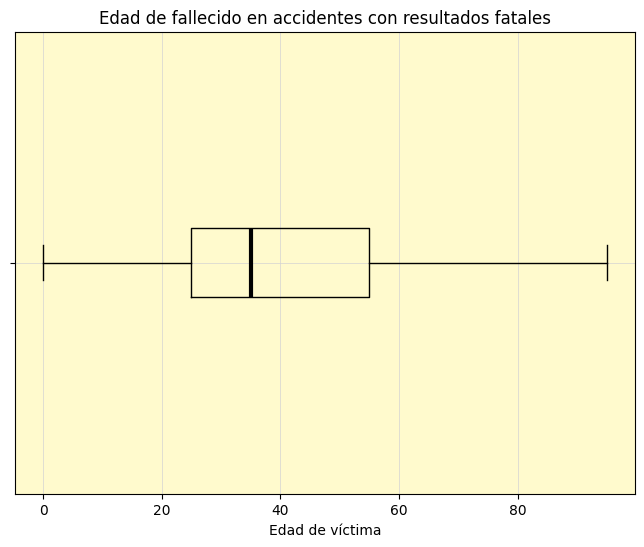

Estadísticas relevantes para df_homicidios.EDAD:
Promedio: 39.240793201133144
Mediana: 35.0
Rango Intercuartil: 30.0
Mínimo: 0
Máximo: 95
Desviación Estandar: 21.816158536063327


In [6]:
# Gráfico de caja y bigotes
plt.figure(figsize=(8, 6))
plt.boxplot(
    df_homicidios["EDAD"],
    vert=False,
    labels=[""],
    medianprops=dict(color="black", linewidth=3),
)
plt.xlabel("Edad de víctima")
plt.title("Edad de fallecido en accidentes con resultados fatales")
plt.gca().set_facecolor("lemonchiffon")
plt.grid(True, color="lightgray", linewidth=0.5, zorder=0)
plt.show()

print("Estadísticas relevantes para df_homicidios.EDAD:")
print(f"Promedio: {df_homicidios['EDAD'].mean()}")
print(f"Mediana: {df_homicidios['EDAD'].median()}")
print(
    f"Rango Intercuartil: {df_homicidios['EDAD'].quantile(0.75)-df_homicidios['EDAD'].quantile(0.25)}"
)
print(f"Mínimo: {df_homicidios['EDAD'].min()}")
print(f"Máximo: {df_homicidios['EDAD'].max()}")
print(f"Desviación Estandar: {df_homicidios['EDAD'].std()}")

Se observa que la edad promedio de fallecimiento en accidenes fatales ronda los 39 años, la mediana, siendo 35 indica que hay más fallecidos de edades menores, ya que el mínimo es 0 y el máximo son 95, se presenta mayor concentración en las edades cercanas a los 30 años, el rango intercuartil con un valor de 30 indica que hay una mayor concentración en los rangos entre los 25 y 55 años, finalmente la desviación estandar, siendo de un poco menos de 22 años, es menor que la media y el rango intercuartil, por lo que no hay una gran dispersión en los datos, se observa la tendencia a las victimas fatales de edades en el rango entre 25 y 35 años, lo que puede señalar conductores novatos, que están consiguiendo su primer vehículo.

**Conclusión Temporal**

Dado que se observa que los accidentes fatales tienen una mayor concentración en edades relativamente jóvenes, es de suponer que sus conductores, inexpertos, son más propensos a tener accidentes, y la sobreconfianza puede llevar a un resultado fatal.
Considerando las observaciones anteriores, se puede justificar la concentración leve en horarios entre las 6 y 11 am, ya que son horas de transporte a escuelas y trabajos, lo que puede generar, junto con el estrés, errores de conducción que puedan resultar en accidentes fatales.

### Vehículo acusado del accidente

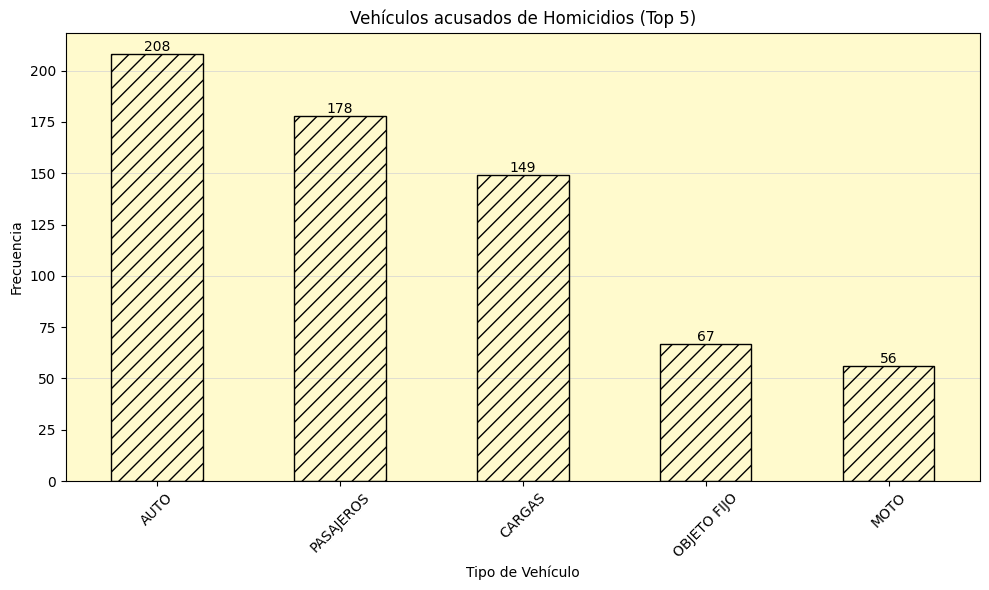

Valores del gráfico de ACUSADO
AUTO           208
PASAJEROS      178
CARGAS         149
OBJETO FIJO     67
MOTO            56
Name: count, dtype: int64


In [7]:
top_5_acusados = df_homicidios["ACUSADO"].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
top_5_acusados.plot(kind="bar", color="none", edgecolor="black", hatch="//")
plt.title("Vehículos acusados de Homicidios (Top 5)")
plt.xlabel("Tipo de Vehículo")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.gca().set_facecolor("lemonchiffon")
for i in range(50, max(top_5_acusados), 50):
    plt.axhline(y=i, color='lightgray', linewidth=0.5, zorder=0)
for i, valor in enumerate(top_5_acusados):
    plt.text(i, valor, str(valor), ha="center", va="bottom")
plt.tight_layout()
plt.show()

print("Valores del gráfico de", top_5_acusados)
del i
del top_5_acusados

se observa que los tipo de acusado más comunes son:
*   Autos, Automóviles de hasta 9 plazas, presumiblemente la mayoría son vehículos particulares, lo que explica que habiendo una mayor cantidad de estos, sea el acusado más común.
*   Pasajeros, personas que están ascendiendo, dentro, o descendiendo de un transporte público, se observará el gráfico de victimas para complementar esta información.
*   Cargas, vehículos con capacidad de carga, principalmente camiones, considerando la gran cantidad de horas que pasan conduciendo, se explica porqué están tan alto en el gráfico.

Otra observación importante, es que alredeedor del 77% de todos los acusados se catalogan dentro de estas 3 categorías.

**Conclusión Temporal**

El tipo de acusado más común se conlleva con lo observado hasta el momento, una persona joven, que está conduciendo rápido para llegar a su trabajo, luego de dejar a sus hijos en la escuela, e incluso a su pareja, va ahora tarde a su lugar de trabajo, por lo que maneja más rápido para poder llegar, y esto puede resultar muy facilmente en un accidente, que lamentablemente puede resultar en resultados fatales, no necesariamente siendo el mismo conductor.

### Transporte que ocupaba la victima del accidente

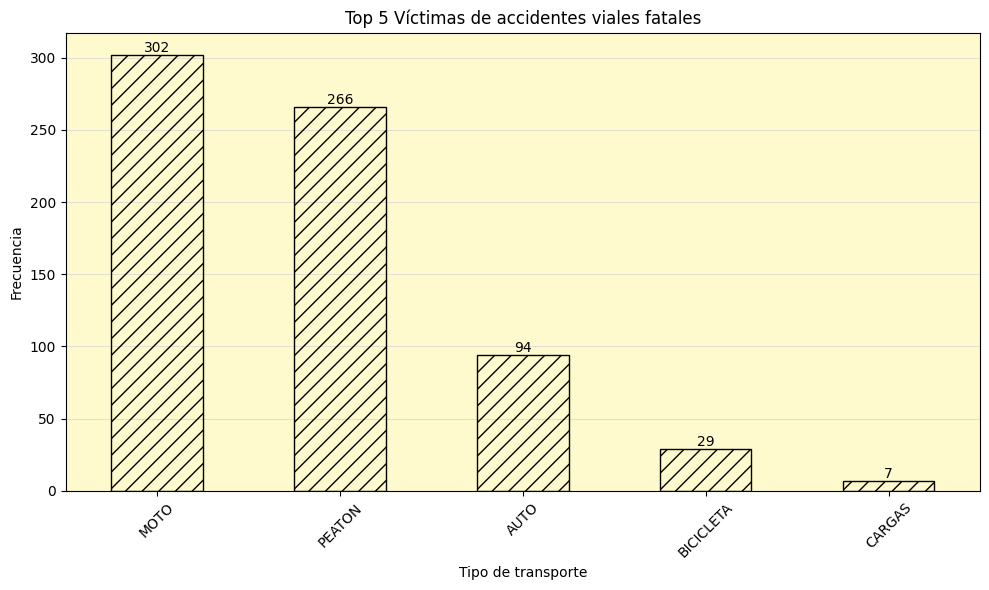

Valores del gráfico de Top 5 Víctimas: VICTIMA
MOTO         302
PEATON       266
AUTO          94
BICICLETA     29
CARGAS         7
Name: count, dtype: int64


In [8]:
top_5_victimas = df_homicidios["VICTIMA"].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
top_5_victimas.plot(kind="bar", color="none", edgecolor="black", hatch="//")
plt.title("Top 5 Víctimas de accidentes viales fatales")
plt.xlabel("Tipo de transporte")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.gca().set_facecolor("lemonchiffon")
for i in range(50, max(top_5_victimas), 50):
    plt.axhline(y=i, color='lightgray', linewidth=0.5, zorder=0)
for i, valor in enumerate(top_5_victimas):
    plt.text(i, valor, str(valor), ha="center", va="bottom")
plt.tight_layout()
plt.show()

print("Valores del gráfico de Top 5 Víctimas:", top_5_victimas)
del i
del top_5_victimas
del valor

se observa que los tipo de transporte más comunes son:
*   Motos, se comprende que el conductor o su pasajero están más expuestos que en otro tipo de vehículo, por lo que un accidente es más propenso a ser fatal.
*   Peatones, similar al punto anterior, están más expuestos que otros vehículos, cabe mencionar que la estadística también es muy similar a la de motos.
*   Autos, Automóviles de hasta 9 plazas, presumiblemente la mayoría son vehículos particulares, lo que explica que habiendo una mayor cantidad de estos, sea una de las víctimas más comunes.

Otra observación importante, es que alredeedor del 80% de las víctimas son Motos o Peatones, y si agregamos los Autos alcanzamos un 94%.

**Conclusión Temporal**

Siguiendo con el ejemplo anterior, este joven, que está conduciendo para llegar rápido a su trabajo, podría tomar la decisión errada de no respetar un pare, o un semáforo en rojo, y dado que no es el único que va atrasado durante estas horas, otros conductores o peatones podrían también ir apurados y no fijandose en su entorno, podría ser el caso de un motociclista que pasa en un cruce, sabiendo que tiene preferencia, pero el antes mencionado conductor que no respetó las normas de tránsito, pasó erradamente y colisionó con el motociclista, causando un accidente.

### Relación de la víctima al acusado

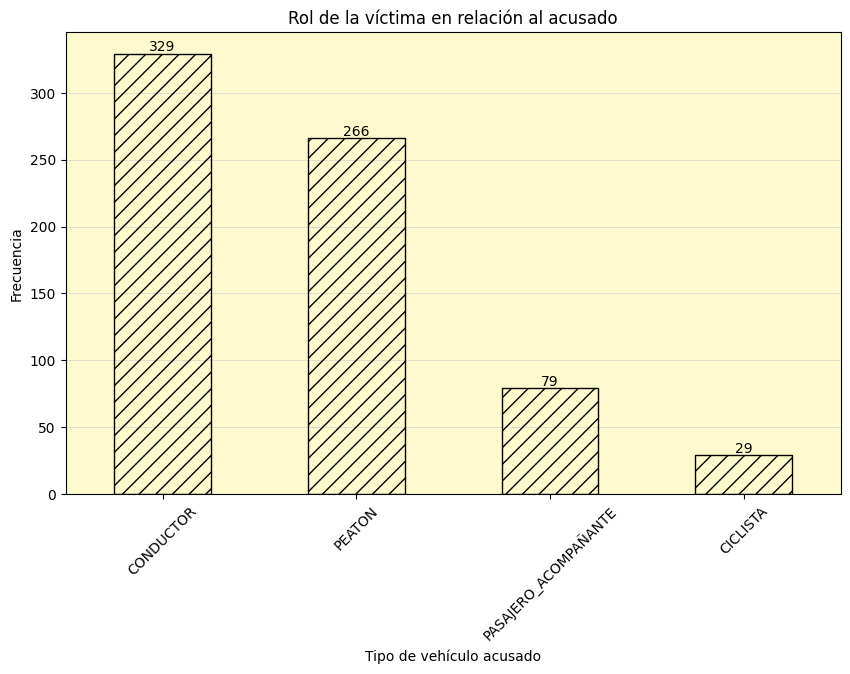

Valores del gráfico de ROL
CONDUCTOR               329
PEATON                  266
PASAJERO_ACOMPAÑANTE     79
CICLISTA                 29
Name: count, dtype: int64


In [9]:
frecuencia_acusado = df_homicidios["ROL"].value_counts()
plt.figure(figsize=(10, 6))
frecuencia_acusado.plot(kind="bar", color="none", edgecolor="black", hatch="//")
plt.title("Rol de la víctima en relación al acusado")
plt.xlabel("Tipo de vehículo acusado")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.gca().set_facecolor("lemonchiffon")
for i in range(50, max(frecuencia_acusado), 50):
    plt.axhline(y=i, color='lightgray', linewidth=0.5, zorder=0)
for i, valor in enumerate(frecuencia_acusado):
    plt.text(i, valor, str(valor), ha="center", va="bottom")
plt.show()

print("Valores del gráfico de", frecuencia_acusado)
del i
del frecuencia_acusado
del valor

se observa que los roles de víctima más comunes son:
*   Conductores, se podría asumir que una porción importante de los vehículos no cuentan con pasajeros, por lo que el único accidentado podría ser el conductor, también se podría considerar que es posible que el conductor no lleve el cinturón de seguridad y los pasajeros si.
*   Peatones, una gran cantidad de las víctimas letales son peatones, quienes no tienen mayor protección durante los accidentes.
*   Pasajero acompañante, en menor medida, una cantidad de los accidentes fatales involucran pasajeros, es notable que esta proporción es de un 24%, aproximadamente 1 de cada 4 accidentes donde fallece un conductor, también fallece un acompalante.

Otra observación importante, es que alredeedor del 84% de las víctimas son conductores o peatones, si consideramos los pasajeros, aumenta al 96%

**Conclusión Temporal**

Los datos son claros, una mayoría de las víctimas de accidentes fatales de conducción son los mismos conductores, esto recalca la necesidad de la conducción a la defensiva, tanto como del uso del cinturón, no sólo en horarios de madrugada que podrían considerarse comunmente como más peligrosos, sino que a toda hora, particularmente son los conductores jóvenes, quienes son más propensos a éstos accidentes, por lo que también hay que reforzar la conciencia social sobre la responsabilidad al volante y quizás aumentar la exigencia a la hora de conseguir licencia de conducción.

### Sexo de la víctima en accidentes fatales

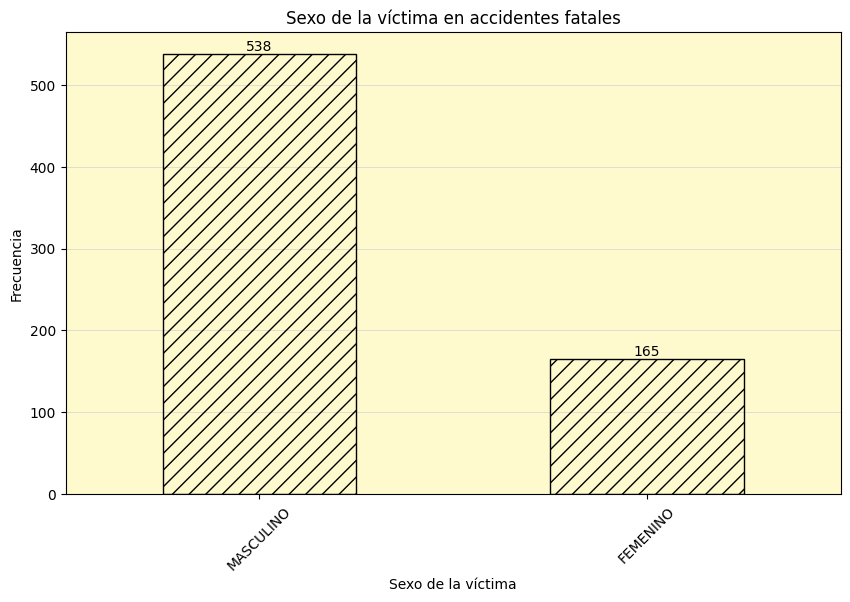

Valores del gráfico de SEXO
MASCULINO    538
FEMENINO     165
Name: count, dtype: int64


In [10]:
frecuencia_acusado = df_homicidios["SEXO"].value_counts()
plt.figure(figsize=(10, 6))
frecuencia_acusado.plot(kind="bar", color="none", edgecolor="black", hatch="//")
plt.title("Sexo de la víctima en accidentes fatales")
plt.xlabel("Sexo de la víctima")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.gca().set_facecolor("lemonchiffon")
for i in range(100, max(frecuencia_acusado), 100):
    plt.axhline(y=i, color='lightgray', linewidth=0.5, zorder=0)
for i, valor in enumerate(frecuencia_acusado):
    plt.text(i, valor, str(valor), ha="center", va="bottom")
plt.show()

print("Valores del gráfico de", frecuencia_acusado)
del frecuencia_acusado
del i
del valor

Se observa que mayormente son los hombres quienes fallecen más en accidentes fatales, esto podría deberse a que normalmente hay más conductores hombres, como también podría deberse a un exceso de confianza al volante. 
No es menor que la proporción es de 3 accidentes fatales en hombres por cada 1 de mujeres, más precisamente, un 76,55% de fatalidades son de hombres, mientras que un 23,45% son de mujeres, esto es más llamativo, considerando que, según un estudio en 2018 sobre seguridad vial realizado por el ministrerio de transporte de Argentina (https://www.argentina.gob.ar/sites/default/files/2018/12/ansv_informe-con-perspectiva-de-genero-en-argentina-marzo-2023.pdf, pag 2), un 35% de las licencias de conducir vigentes pertenecen a mujeres, mientras que un 65% pertenecen a hombres.
Si bien, la proporción de accidentes es de 3 a 1, la cantidad de licencias es de 2 a 1, por lo que se destaca que los hombres sufren más accidentes viales fatales que las mujeres, tanto como un valor absoluto, como en proporción a cantidad de conductores.

### **Conclusión del análisis**

El foco principal para disminuir los accidentes viales fatales, según los datos, serían los hombres jovenes, entre 25 y 35 años, principalmente solteros, este grupo es el que más propenso está a ser víctima en un accidente vial fatal.

Sería importante para reducir la cantidad de accidentes, hacer una campaña de concientización sobre el uso de cinturón de seguridad, así como aumentar los requisitos para conseguir licencia de conducción, lamentablemente el factor principal en una gran cantidad de accidentes sigue siendo el conductor, y la inexperiencia al volante puede llevar a muchos a tomar decisiones equivocadas.

## **Analisis Bivariado**

Se realizarán análisis Bivariados para profundizar los análisis monovariados realizados previamente.

### Análisis de relación entre Edad y Sexo de las víctimas.

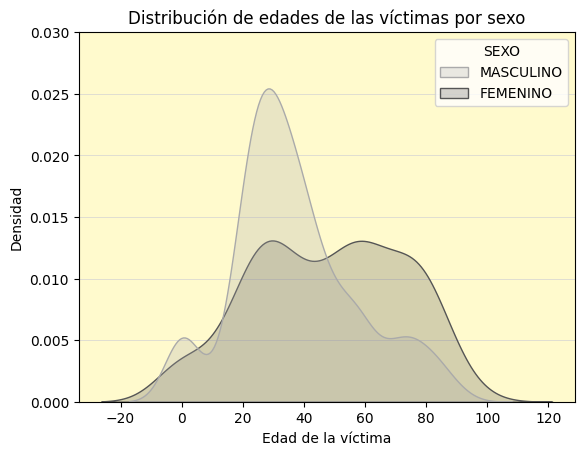

Edad promedio de las víctimas masculinas: 36.86988847583643
Edad promedio de las víctimas femeninas: 47.68484848484849


In [11]:
plt.gca().set_facecolor("lemonchiffon")
sns.kdeplot(data=df_homicidios, x='EDAD', hue='SEXO', fill=True, common_norm=False, palette='gray_r')
plt.xlabel('Edad de la víctima')
plt.ylabel('Densidad')
plt.title('Distribución de edades de las víctimas por sexo')
plt.ylim(0, 0.03)  
for i in np.arange(0, 0.03, 0.005):
    plt.axhline(y=i, color='lightgray', linewidth=0.5, zorder=0)
plt.show()

print("Edad promedio de las víctimas masculinas:", df_homicidios[df_homicidios['SEXO'] == 'MASCULINO']['EDAD'].mean())
print("Edad promedio de las víctimas femeninas:", df_homicidios[df_homicidios['SEXO'] == 'FEMENINO']['EDAD'].mean())
del i

Se observa una forma de campana muy marcada en la distribución de "MASCULINO", con un máximo en las edades cercanas a 30 años, además, disminuye la frecuencia mientras aumenta la edad. También se observa una campana, pero menos pronunciada en la distribución de "FEMENINO", que tendría su máximo rondando los 50 años, lo que contrasta con la edad más joven en los hombres.
Se puede concluir que cuando las víctimas de accidentes son hombres, suelen ser más jovenes que las mujeres.
El promedio de edad de fallecimiento en hombres es de 37 años, mientras que las mujeres tienen un promedio de 47 años.

*Conclusión temporal*

Se puede concluir hasta el momento que sí existe una relación entre edad y sexo, ya que los hombres suelen ser más jovenes que las mujeres en esta estadística.

### Análisis de relación entre Acusado y Víctima

Se realizará el cruce entre el top 3 de ambas vatiables, para simplificar el análisis.

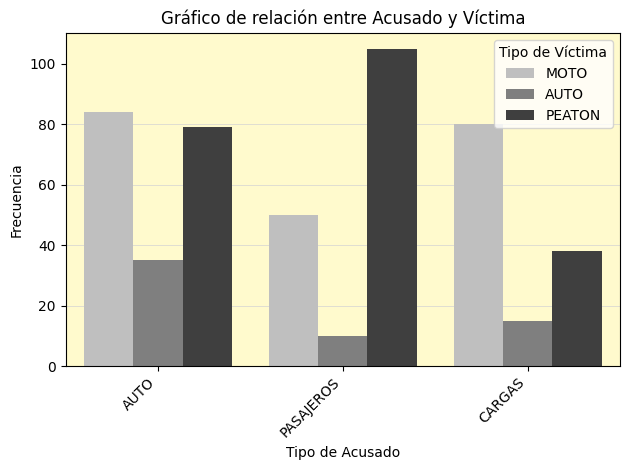

Frecuencias de combinaciones de Acusado y Víctima:
VICTIMA    AUTO  MOTO  PEATON
ACUSADO                      
AUTO         35    84      79
CARGAS       15    80      38
PASAJEROS    10    50     105


In [12]:
top_acusados = df_homicidios['ACUSADO'].value_counts().nlargest(3).index
top_victimas = df_homicidios['VICTIMA'].value_counts().nlargest(3).index
df_filtered = df_homicidios[df_homicidios['ACUSADO'].isin(top_acusados) & df_homicidios['VICTIMA'].isin(top_victimas)]
frecuencias = df_filtered.groupby(['ACUSADO', 'VICTIMA']).size().unstack(fill_value=0)
plt.gca().set_facecolor("lemonchiffon")
sns.countplot(data=df_filtered, x='ACUSADO', hue='VICTIMA', palette='gray_r')
plt.xlabel('Tipo de Acusado')
plt.ylabel('Frecuencia')
plt.title('Gráfico de relación entre Acusado y Víctima')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Víctima')
for i in np.arange(0, 100, 20):
    plt.axhline(y=i, color='lightgray', linewidth=0.5, zorder=0)
plt.tight_layout()
plt.show()
print("Frecuencias de combinaciones de Acusado y Víctima:")
print(frecuencias)
del df_filtered
del frecuencias
del i
del top_acusados
del top_victimas

Se observa que la combinación Acusado/Víctima con mayor frecuencia es de Pasajeros/Peatón, lo que parece señalar un problema con los conductores de transporte público.

También se observa con el cruce que "AUTO" es más común que sea acusado, más que víctima.

**Conclusión Temporal**

El análisis de este gráfico acusa información nueva, una parte significativa de los accidentes fatales tiene relación con los vehículos de transporte y sus pasajeros, si bien, la cantidad de casos relacionados con Autos son mayores que los relacionados con vehículos de transporte de pasajeros, se destaca que si el acusado es un vehículo de pasajeros, es más común que haya una mayor cantidad de fallecimientos, por lo que se podría considerar realizar más controles a los conductores de transporte público.

### Análisis de relación entre Sexo y Rol de la víctima

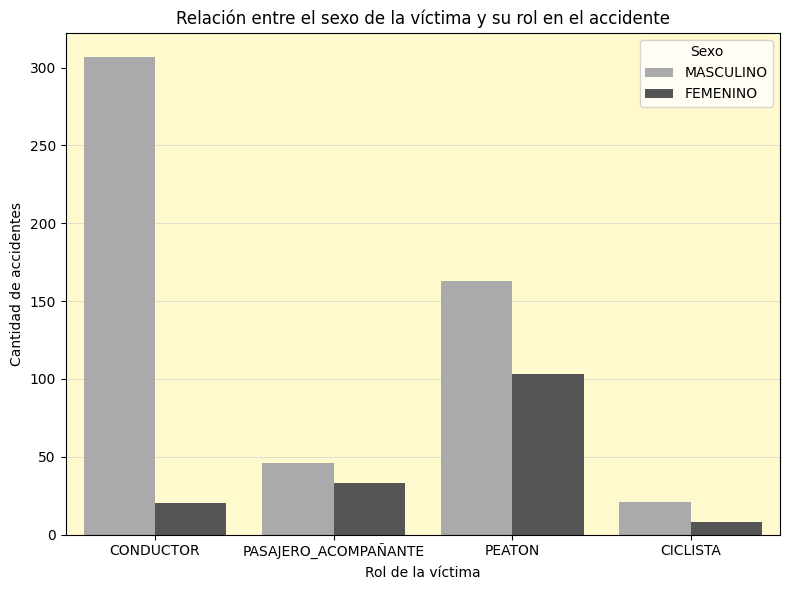

Cantidad de conductores masculinos: 307
Cantidad de conductores femeninos: 20


In [13]:
plt.figure(figsize=(8, 6))
plt.gca().set_facecolor("lemonchiffon")
sns.countplot(x='ROL', hue='SEXO', data=df_homicidios, palette='gray_r')
plt.title('Relación entre el sexo de la víctima y su rol en el accidente')
plt.xlabel('Rol de la víctima')
plt.ylabel('Cantidad de accidentes')
plt.legend(title='Sexo')
plt.tight_layout()
for i in np.arange(0, 300, 50):
    plt.axhline(y=i, color='lightgray', linewidth=0.5, zorder=0)
plt.show()

conductores_masculinos = df_homicidios[(df_homicidios['SEXO'] == 'MASCULINO') & (df_homicidios['ROL'] == 'CONDUCTOR')]
conductores_femeninos = df_homicidios[(df_homicidios['SEXO'] == 'FEMENINO') & (df_homicidios['ROL'] == 'CONDUCTOR')]
cantidad_conductores_masculinos = conductores_masculinos.shape[0]
cantidad_conductores_femeninos = conductores_femeninos.shape[0]
print("Cantidad de conductores masculinos:", cantidad_conductores_masculinos)
print("Cantidad de conductores femeninos:", cantidad_conductores_femeninos)
del conductores_femeninos
del conductores_masculinos
del cantidad_conductores_femeninos
del cantidad_conductores_masculinos
del i

Se observa que en la totalidad de los casos, el hombre es la victima con mayor probabilidad de fallecer en un accidente, también se observa una muy marcada diferencia entre conductores hombres y mujeres, siendo más de 15 veces mayor la cantidad de conductores hombres que fallecen en accidentes comparado con las mujeres en la misma condición.

### **Conclusión**

Que los hombres fallezcan 15 veces más que las mujeres al estar conduciendo indica claramente que la diferencia de edad en los fallecimientos entre ambos sexos no es una coincidencia, se puede concluir que la edad del conductor juega un rol primordial sobre la forma de conducción y el cuidado al volante, los hombres parecen tener tendencias más temerarias, lo que lleva a más accidentes, también se puede complementar con las observaciones anteriores, si se considera que es más común ver hombres, conduciendo vehículos de transporte público.

----

# **Enunciado Henry**


Las tasas de mortalidad relacionadas con siniestros viales suelen ser calculadas como el número de muertes por cada cierto número de habitantes o por cada cierta cantidad de vehículos registrados.


## **Contexto**


En Argentina, cada año mueren cerca de 4.000 personas en siniestros viales, Aunque se ha logrado disminuir la cantidad de accidentes de tránsito, esta sigue siendo la principal causa de muertes en el país.
Los informes del Sistema Nacional de Información Criminal (SNIC), del Ministerio de Seguridad de la Nación, revelan que entre 2018 y 2022 se registraron 19.630 muertes en siniestros viales en todo el país. Estas cifras equivalen a 11 personas por día.

Solo en 2022, se contabilizaron 3.828 muertes fatales en este tipo de hechos. Los expertos en la materia indican que en Argentina es dos o tres veces más alta la probabilidad de que una persona muera en un siniestro vial que en un hecho de inseguridad delictiva


## **Rol a desarrollar**


El `Observatorio de Movilidad y Seguridad Vial` (OMSV), centro de estudios que se encuentra bajo la órbita de la **_Secretaría de Transporte_** del Gobierno de la Ciudad Autónoma de Buenos Aires, nos solicita la elaboración de un proyecto de anális de datos, con el fin de generar información que le permita a las autoridades locales tomar medidas para disminuir la cantidad de víctimas fatales de los siniestros viales.
Para ello, nos disponibilizan un dataset sobre homicidios en siniestros viales acaecidos en la Ciudad de Buenos Aires durante el periodo 2016-2021. Este dataset se encuentra en formato _xlsx_ y contiene dos hojas llamadas: **hechos** y **víctimas**. Asimismo, observarán que incluye otras dos hojas adicionales de diccionarios de datos, que les podrá servir de guía para un mayor entendimiento de la data compartida.


# **Propuesta de trabajo -mínimos entregables-**


_Es importante que a la hora de empezar a desarrollar cada item, y tu demo, te ayudes tambien de la [rúbrica de evaluación](https://docs.google.com/spreadsheets/d/e/2PACX-1vTy9Ome3iLIl40SZ2jciZLiwARr9MVXfo_Mud3vVCin9P4zroAw_oxVQVch6m4TKivmUjFrYJKMJJhS/pubhtml)._ 😄


## `Dashboard`


Debe ser funcional y coherente con el storytelling. El dasbhoard tiene que incluir **filtros**, permitiendo explorar detalladamente los datos con la selección de cada uno de ellos. Es decir, es indispensable que sea **interactivo**. También, se espera que el diseño que implementen facilite la interpretación de la información y su análisis, siendo importante, para ello, la claridad en la presentación de los datos, aspectos inherentes a la esteticidad, elección coherente de los gráficos según las variables a visualizar, entre otros ítems.

- [Utiliza el workshop de streamlit para aprender](https://www.app.soyhenry.com/lecture/dc30f5d1-573e-4f65-a7c6-7058eabcbcf4)
- [Debes ver el workshop de Data to Viz y Storytelling, ayudará a crear el dashboard](https://www.app.soyhenry.com/lecture/dc30f5d1-573e-4f65-a7c6-7058eabcbcf4)
- El Dashboard refleja lo del eda, pero más boniti
- Considera agregar botones de navegación, dan un plus
- Hacerlo en modo obscuro(?) (será mejor hacerlo cambiable?)
- KPi primero o después? qué quiero para mi Storytelling?

* El dashboard es altamente interactivo: los filtros, selecciones y acciones implementadas son eficientes y se pueden utilizar estratégicamente para mostrar información clave y agregar valor el análisis. Además, la UX es positiva: su navegación es intuituva y la comprensión de las funciones no requiere instrucciones adicionales
* Demuestra una clara comprensión del propósito de un dashboard como un tablero de control. Muestra una visión general de los datos y proporciona información clave para la toma de decisiones. El dashboard está diseñado de manera coherente con ese propósito y se enfoca en los indicadores clave relevantes para el análisis y el planteamiento del rendimiento respecto al objetivo (KPIs bien representados).
* La disposición y el diseño de la información es excelente y facilita su comprensión. Los elementos están alineados y la elección de colores y tipografía son consitentes a lo largo de todo el dashboard, facilitando la legibilidad de la información y creado una visual ordenada y de apariencia profesional. Además, se uitlizan técnicas de diseño (como tamaño, color, posición) de forma estratégica, logrando guiar la atención del usuario hacia la información relevante.
* La elección de gráficas se corresponde al tipo de variable y representa apropiadamente lo que pretende. Contiene todos los elementos visuales adecuados para lograr una comunicación efectiva: el estilo es uniforme/consistente, la escala utilizada es adecuada y los titulos de ejes y etiquetas son descriptivos. Además, el idioma y la denominación de las variables se encuentran unificados.


## `KPIs`


Debes graficar y medir los 2 KPIs propuestos a continuación, representándolos adecuadamente en el dashboard. A su vez, tambíen tienes que proponer, medir y graficar un tercer KPI que consideres relevante para la temática.
Los dos KPIs propuestos son:

- _Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en Ciudad Autónoma de Buenos Aires (CABA), en comparación con la tasa de homicidios en siniestros viales del semestre anterior_.

  Definimos a la **tasa de homicidios en siniestros viales** como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico.
  Su fórmula es: (Número de homicidios en siniestros viales / Población total) \* 100,000

- _Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en Ciudad Autónoma de Buenos Aires (CABA), respecto al año anterior_.

  Definimos a la **cantidad de accidentes mortales de motociclistas en siniestros viales** como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal.
  Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) \* 100

`MUY IMPORTANTE` repasar qué es un KPI y cómo se diferencia de una métrica convencional. En el material de apoyo tienen lectura que puede ser de ayuda.</small>

- Se utilizan como mínimo 3 KPIs de manera adecuada y se integran en el dashboard del proyecto de análisis de datos. El estudiante puede explicar y defender la elección y utilización de los KPIs seleccionados.

- Además, demuestra un sólido entendimiento de la distinción conceptual entre métrica y KPI, evidenciado por la correcta selección de visualización para cada KPI, utilizando gráficos o representaciones visuales apropiadas.

MI KPI!!!!

- Buscar la comuna con más accidentes
- Buscar las comunas por sobre el promedio
- Aplicar Valores y Porcentajes
- Piensa en Cajas y Bigotes


In [ ]:
#KPI
import matplotlib.pyplot as plt
import seaborn as sns

accidentes_por_comuna = df_homicidios['COMUNA'].value_counts()
promedio_accidentes = accidentes_por_comuna.mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=accidentes_por_comuna.index, y=accidentes_por_comuna.values)
plt.axhline(y=promedio_accidentes, color='r', linestyle='--', label='Promedio de accidentes')  # Agregar línea horizontal
plt.title('Número de accidentes por comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de accidentes')
plt.legend()
plt.show()
print("Promedio de accidentes fatales por comuna:", promedio_accidentes)

total_accidentes_fatales = df_homicidios['N_VICTIMAS'].sum()
porcentajes_accidentes_fatales = (df_homicidios.groupby('COMUNA')['N_VICTIMAS'].sum() / total_accidentes_fatales) * 100
print("\nPorcentajes de accidentes fatales por", porcentajes_accidentes_fatales)

del porcentajes_accidentes_fatales
del total_accidentes_fatales
del accidentes_por_comuna
del promedio_accidentes

## `Repositorio de GitHub`


El repositorio debe contener un **Readme** principal donde presenten, en una primera instancia, de forma general **su proyecto** y detallen qué hay en cada archivo/carpeta del propio repositorio. Este Readme no puede ser el mismo de la consigna que nosotros les entregamos.
A su vez, el Readme debe incluir un **reporte de análisis con base en sus dashboards**, así como el análisis y la funcionalidad de los KPIs sugeridos.

- El Readme.md del proyecto va más allá de los requisitos mínimos. Proporciona una descripción detallada y completa del proyecto, incluyendo una presentación clara y concisa del mismo. Se mencionan las tecnologías y herramientas utilizadas en el proyecto, así como la metodología aplicada de manera exhaustiva.

- Además, se presentan análisis detallados y conclusiones fundamentadas que demuestran un profundo entendimiento de los datos analizados.


## _**Desafíate y no te quedes siendo Junior, sé Junior Advanced**_


Pensando en alcanzar tu Boom 🚀, te recomendamos incorporar los siguientes desafíos para tener un portfolio mucho más completo y competitivo:

- Crear una base de datos en un motor SQL, ingestar el dataset procesado y utilizarla como fuente de datos de su dashboard en Power BI (o la herramienta de visualización que utilice).
- Ejecutar scripts de Python en la herramienta de visualización de datos escogida.
- Cruce de datos con datasets complementarios, ya sea para obtener información nueva o poder comparar la información disponible para todas las plataformas.

<sub> Nota: la realización de uno o más de estos ítems no es intercambiable con los requerimientos mínimos establecidos en la sección anterior "Propuesta de trabajo". Empiece con esta sección una vez haya cumplido con los requerimientos mínimos, a modo de desafiarse a usted mismo y destacar frente al resto.</sub>


# Fuente de datos


# Lo que tendremos en cuenta a la hora de evaluar


Serás evaluado en dos grandes áreas `Tech` y `Soft`!

Ambas con igual peso entre si y ambas deben ser aprobatorias para tener la calidad de aprobado en este PIDA. Ten presente que una nota minima para aprobar significa tener TODOS los items como "Bueno" 👌
A continuacion te facilitamos nuevamente la [rúbrica de evaluación](https://docs.google.com/spreadsheets/d/e/2PACX-1vTy9Ome3iLIl40SZ2jciZLiwARr9MVXfo_Mud3vVCin9P4zroAw_oxVQVch6m4TKivmUjFrYJKMJJhS/pubhtml) con la que seras evaluado por tu corrector@. Recuerda que el feedback de tu corrector@ no es en ningun momento un indicativo de tu nota. Si tienes alguna duda durante tu DEMO, pidele a tu corrector@ que te aclare claramente cuales son los objetivos de aprendizaje no cumplidos.

Esperamos que te sirva de guia de aprendizaje, y recuerda que no se trata solo de cumplir requisitos, sino de destacar en cada nivel 🚀 💛


## Material de apoyo


- [Notas para el uso del dataset de homicidios de siniestros viales de la CABA](https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/victimas-siniestros-viales/NOTAS_HOMICIDIOS_SINIESTRO_VIAL.pdf)
- [Observatorio de Movilidad y Seguridad Vial de la Ciudad Autónoma de Buenos Aires](https://buenosaires.gob.ar/observatorio-de-movilidad-y-seguridad-vial)


## Tech


- [Repaso de clase sobre EDA](https://www.students.soyhenry.com/classes/100?cohortId=106&videoOrdinal=1)
- [Code Review: **Interactividad** Dashboard, Patron Z, **Tooltips**](https://www.students.soyhenry.com/classes/93?cohortId=124&videoOrdinal=2)
- [KPI's 4 students](https://docs.google.com/document/d/1DI0ZVgHfOfjgnXGhi8jEKzwCIjtUdgRUDe-qiiGGq8E/edit)
- [Code Review: DAX y **medidas calculadas**](https://www.students.soyhenry.com/classes/96?cohortId=124&videoOrdinal=2)


## Soft


- ¡Todos los Workshops de esta etapa serán de gran utilidad para tener un proyecto exitoso!

* [Practice to perfect](https://vimeo.com/906514592/1ae3a5de05?share=copy)

Análisis

- Su análisis agrega un valor significativo a los datos. Logra incluir una contextualización sólida y realiza cruces de datos con otras fuentes relevantes. Presenta perspectivas de análisis creativas, elaborando conclusiones que son novedosas y aportan una comprensión más profunda del tema.

Oralidad

- Articula el discurso de manera fluida, sin interrupciones. Lo hace con confianza y utilizando un lenguaje apropiado y preciso.

Storytelling

- Adopta el rol de un analista de datos de manera efectiva. Su discurso sigue un esquema claro y coherente, con un hilo conductor bien definido. Presenta un mensaje claro y un argumento sólido que conecta con la audiencia. Utiliza técnicas de narración y recursos visuales adecuados para enriquecer la presentación y mantener el interés de la audiencia.

Recepción de feedback

- Se muestra predispuesto y receptivo. Escucha con entusiasmo sus oportunidades de mejora

Puntualidad

- Está disponible a la hora pactada.

Preparación

- El estudiante realiza la exposición respetando el tiempo estipulado. Muestra un entorno organizado y libre de distracciones. Además, domina las herramientas y recursos utilizados, y ha configurado todos los aspectos técnicos necesarios para la exposición se desarrolle sin inconvenientes.

* Storytelling
* contexto
* "mi proyecto trata de vialidad de CABA... (que me entregaron ustedes)"
* estos son los insights que pude destacar
* conclusión
